# General

### All path DFS

In [8]:
  def allPathDFSUtils(graph, source, dest, visited, stack):
    visited[source] = True
    stack.append(source)
    if source == dest:
        pri nt(stack)
    else:
        for neighbour in graph[source]:
            if not visited[neighbour]:
                allPathDFSUtils(graph, neighbour, dest, visited, stack) 
    stack.pop()
    visited[source] = False
    
def allPathsDFS(graph, source, dest):
    stack = []
    visited = [False for i in range(len(graph))]
    allPathDFSUtils(graph, source, dest, visited, stack)


In [9]:
graph = [[1, 2], [0, 3], [3, 4, 0], [1, 2, 4, 5], [3, 5, 2], [4, 3]]
n = 6
allPathsDFS(graph, 0, 5)

[0, 1, 3, 2, 4, 5]
[0, 1, 3, 4, 5]
[0, 1, 3, 5]
[0, 2, 3, 4, 5]
[0, 2, 3, 5]
[0, 2, 4, 3, 5]
[0, 2, 4, 5]


### Shortestpath using BFS

In [1]:
# NOTICE: here no need for visited because if you go back from where u came you increase distance, and  we ain't doing that.
graph = [[1, 2], [0, 3], [3, 4, 0], [1, 2, 4, 5], [3, 5, 2], [4, 3]]
n = 6; inf = int(1e10)
start = 0
from collections import deque
dis = [inf]*n
dis[start] = 0
q = deque([start])
while q:
    node = q.popleft()
    for i in graph[node]:
        if dis[i]>dis[node]+1:
            dis[i] = dis[node]+1 
            q.append(i)
print(dis)

[0, 1, 1, 2, 2, 3]


### Dijkstra

In [13]:
# NOTICE: here no need for visited because if you go back from where u came you increase distance,
# and we ain't doing that.
from heapq import *
graph = [[(1, 1), (2, 3)], [(0, 1), (3, 2)], [(3, 3), (4, 2), (0, 3)],
         [(1, 2), (2, 3), (4, 4), (5, 4)], [(3, 4), (5, 1), (2, 2)], [(4, 1), (3, 4)]]
n = 6; inf = int(1e10)
dis =[inf]*n
start = 0
dis[start] = 0
q = [(0, start)]
while q:
    d, node = heappop(q)
    for i in graph[node]:
        nn, w = i
        if dis[nn]>dis[node]+w:
            dis[nn] = dis[node]+w
            heappush(q, (dis[nn], nn))
print(dis)

[0, 1, 3, 3, 5, 6]


### Bellmon-Ford

Any simple path will have max of V-1 node. So if we relax all edges V-1 times path should be minimum.  
If no negetive cycle then Vth iteration does't relax.

In [21]:
# code
graph = [[(1, 1), (2, 3)], [(0, 1), (3, 2)], [(3, 3), (4, 2), (0, 3)], [(1, 2), (2, 3), (4, 4), (5, 4)], [(3, 4), (5, 1), (2, 2)], [(4, 1), (3, 4)]]
n = 6; inf = int(1e10)
dis =[inf]*n
start = 0
dis[start] = 0

for _ in range(n-1):
    for i in range(len(graph)):
        for j in graph[i]:
            nn, w = j
            if dis[nn]>dis[i]+w: dis[nn] = dis[i]+w
x = 0
for i in range(len(graph)):
    for j in graph[i]:
        nn, w = j
        if dis[nn]>dis[i]+w: x = 1; break
print(dis)
print(x)

[0, 1, 3, 3, 5, 6]
0


### Floyd Warshall

Idea: for evey kth node assume it to be intermediate point of ith and jth node(This is strict). Perform relaxation

In [27]:
graph = [[(1, 1), (2, 3)], [(0, 1), (3, 2)], [(3, 3), (4, 2), (0, 3)], [(1, 2), (2, 3), (4, 4), (5, 4)], [(3, 4), (5, 1), (2, 2)], [(4, 1), (3, 4)]]
n = 6; inf = int(1e10)
dis = [[inf if i != j else 0 for j in range(n)] for i in range(n)]
# converting into adjancy matrix
for i in range(len(graph)):
    for nn, w in graph[i]:
        dis[i][nn] = w
# first k than i than j. Its is strictly like this. other wise wrong answer.
for k in range(n):
    for i in range(n):
        for j in range(n):
            dis[i][j] = min(dis[i][j], dis[i][k]+dis[k][j])
for i in dis: print(i)

[0, 1, 3, 3, 5, 6]
[1, 0, 4, 2, 6, 6]
[3, 4, 0, 3, 2, 3]
[3, 2, 3, 0, 4, 4]
[5, 6, 2, 4, 0, 1]
[6, 6, 3, 4, 1, 0]


# MST

### Prims
Simple greedy.Take a node and find the edge with lowest weight.  
But if that edge has the other node already visited than don't take it and continue to other edge.  
Only mark visited if that node is out of queue. This is not BFS so don't make mistake of marking visited as as soon as you visit it.    
It may happend a node is already visited is inside queue becuase you are not inserting with respect of node but edges so simply ignore the visited nodes.  

In [3]:
from heapq import *
# graph = [[(1, 1), (2, 3)], [(0, 1), (3, 2)], [(3, 3), (4, 2), (0, 3)], [(1, 2), (2, 3), (4, 4), (5, 4)], [(3, 4), (5, 1), (2, 2)], [(4, 1), (3, 4)]]
ee  = [[0, 5, 7], [0, 2, 2], [0, 3, 5], [1, 5, 6], [1,2,3], [1,3,2], [3,4,4], [2,4,3]]
n = 6

graph = [[] for i in range(n)]

for i in ee:
    a, b, w = i
    graph[a].append([b, w])
    graph[b].append([a, w])

q = [(0, 0)]
v = [0]*n
cost = 0
while q:
    w, node = heappop(q)
    if v[node]: continue
    cost += w
    v[node] = 1
    for i, k in graph[node]:
        if not v[i]: heappush(q, (k, i))
print(cost)

16


### kruskal

Sort all edges in increasing order. take them one by one and if an edge does not add cyle to graph include it. and take only $v-1$ edges.

In [7]:
graph = [[(1, 1), (2, 3)], [(0, 1), (3, 2)], [(3, 3), (4, 2), (0, 3)], [(1, 2), (2, 3), (4, 4), (5, 4)], [(3, 4), (5, 1), (2, 2)], [(4, 1), (3, 4)]]
n = 6
parent = [-1]*n
edges = []

def find(x):
    if parent[x] == -1: return x
    parent[x] = find(parent[x])
    return parent[x]

for i in range(n):
    for node, w in graph[i]:
        edges.append((w, i, node))
edges.sort()
cnt = 0
ans = 0
for i in edges:
    if cnt == n-1: break
    w, a, b = i
    x = find(a)
    y = find(b)
    if x != y:
        ans += w
        parent[x] = y
        cnt+=1
print(ans)

9


# Topological sorting

Only for connected directed acyclic graph. Order of nodes such dirction of flow is always forward while iterating through list.

## Recursive Apporach

In [2]:
#code 1
# simple dfs in forward direction, and while falling back keep append the node in left of deque.
graph = [[], [2], [3], [], [0, 1], [0, 2]]
n = 6
from collections import deque
stack = deque()
v = [0]*n
def dfs(node):
    v[node] = 1
    for i in graph[node]:
        if not v[i]: dfs(i)
    stack.appendleft(node)

for i in range(n):
    if not v[i]: dfs(i)
print([*stack])

[5, 4, 1, 2, 3, 0]


## Queue Apporach

In [ ]:
#code 2
# start traversing from all nodes with 0 indegree using bfs. and only when reached some node reduce its indegree by 1. 
# if indegree is 0 then append
# in q, whenever poping from q append that node to ans.
# if asked in sorted order alway keep queue sorted.
graph = [[] for _ in range(n)]
indeg =  [0]*n
for i in range(m):
    a, b = map(int, input().split())
    graph[a-1].append(b-1)
    indeg[b-1]+=1
q = deque()
v = [0]*n
ans = []
for i in range(n):
    if indeg[i] == 0: q.append(i)
while q:
    node = q.popleft()
    ans.append(node+1)
    for i in graph[node]:
        if v[i] == 0:
            indeg[i]-=1
            if indeg[i] == 0:
                q.append(i)
                v[i] = 1
if len(ans) == n: print(*ans)
else: print("IMPOSSIBLE")

# Cycle Detection

## CD in directed graph

Color technique is good enough.  
But topological technique works also cause topological sorting is only in DAC so if not in topo. order then not DAC.

### Color technique

In [48]:
#code
graph = [[1, 2], [0, 3], [3, 4, 0], [1, 2, 4, 5], [3, 5, 2], [4, 3]]
n = 6
color = [0]*n
def dfs(graph, color, node):
    color[node] = 1
    for i in graph[node]:
        if color[i] == 1: return 1
        elif color[i] == 0 and dfs(graph, color, i): return 1
    color[node] = 2
    return 0
ans = 0
for i in range(n):
    if dfs(graph, color, i): ans = 1; break
print(ans) # if cycle print 1 else 0

1


## CD in Undirected graph

### Color technique
Same as in directed just don't consider the parent path.

In [4]:
#code
graph = [[1, 2], [0, 3], [3, 4, 0], [1, 2, 4, 5], [3, 5, 2], [4, 3]]
n = 6
color = [0]*n
def dfs(node, p):
    color[node] = 1
    for i in graph[node]:
        if i == p: continue
        if color[i] == 1: return 1
        if color[i] == 0 and dfs(i, node):  return 1
    color[node] = 2
    return 0
ans = 0
for i in range(n):
    if dfs(i, -1): ans = 1; break
print(ans) # if cycle print 1 else 0

1


### Disjoint Set technique
Go through each edge and while traversing find the node current set and if it is already in its ancestor's set there is a cycle. else union them.

In [8]:
graph = [[1, 2], [0, 3], [3, 4, 0], [1, 2, 4, 5], [3, 5, 2], [4, 3]]
n = 6
parent = [-1]*n
def findParent(node):
    if parent[node] == -1: return node
    parent[node] = findParent(parent[node])
    return parent[node]
    
ans = 0
for i in range(n):
    for j in graph[i]:
        x, y = findParent(i), findParent(j)
        if x == y: ans = 1; break
        else: parent[x] = y # unionParent(x, y)
print(ans)

1


# strongly Connnectivity - Kosaraju

An undirected graph is always strongly connected unless its a forest.  
This is mainly for directed graph.  

If only to find strongly connectivity, just do a dfs in normal graph and then do a dfs from same point in reverse graph if both time all nodes visited then strongly connect else not.  
The idea is, if every node can be reached from a vertex v, and every node can reach v, then the graph is strongly connected.  

## Is Strongly connected ?

In [1]:
graph = [[], [2], [3], [], [0, 1], [0, 2]]
n = 6
matrix = [[0 for _ in range(n)] for _ in range(n)]
for i in range(n):
    for j in graph[i]:
        matrix[i][j] = 1
t_graph = [[] for _ in range(n)]
for j in range(n):
    for i in range(n):
        if matrix[j][i] == 1: graph[j].append(i)

v = [False]*n
def dfs(graph, node):
    v[node] = True
    for i in graph[node]:
        if not v[i]: dfs(graph, i)

dfs(graph, 0)
ans = True
for i in v: ans = ans and i
if ans:
    v = [False]*n
    dfs(t_graph, 0) 
    for i in v: ans = ans and i
print(ans)

False


## Finding Stronly connected components

First do a forward dfs and store the processed points in stack, basically get the topological sorting. This way you make sure that when traversing reverse graph you don't go into other connected components.  
eg. sub-graph A is strongly connect and sub-graph B is strongly connected in themselves.  
and they have structure like this $$A->B$$ A connect to B.  
Now in topological order A comes first so processed list will be A then B.
but in reverse graph you can not go from A to B. because now $$A<-B$$
so A get isolated from B becuase you are in topological order which is A and B. Now A is strongly connected so traverse in A and print them and then do it for B.

In [2]:
n, m = map(int ,sys.stdin.readline().split())
graph = [[] for i in range(n)]
trans = [[] for i in range(n)]

for i in range(m):
    a,b = map(int, sys.stdin.readline().split())
    graph[a-1].append(b-1)
    trans[b-1].append(a-1)

stack = []
v = [0]*n
comp = []

def dfs1(node):
    v[node] = 1
    for i in graph[node]:
        if not v[i]: dfs1(i)
    stack.append(node)


def dfs2(node):
    v[node] = 1
    comp.append(node)
    for i in trans[node]:
        if not v[i]: dfs2(i)

for i in range(n):
    if not v[i]: dfs1(i)
v = [0]*n
ans = []
stack.reverse()
for i in stack:
    if not v[i]:
        dfs2(i)
        if comp:
            ans.append(comp[-1]+1)
        if len(ans)>=2:
            print("NO")
            print(ans[1], ans[0])
            sys.exit()
print("YES")

NameError: name 'sys' is not defined

# Atriculation points

Articulation points only occurs when there are no backedges connecting differents graph. To keep track of these backedges we create two arrays.
discovery array and lowest time array. discovery array keeps the track of DFS traversal time of graph while lowest time array keeps the track of those components which are connect via some back edge. Threrefore the lowest time array is always the minimum discovery time of the connected componnents with the first backedge.

video [link](https://www.youtube.com/watch?v=jFZsDDB0-vo) for better explanation.

In [37]:
#code
graph = [[1, 2], [0, 3], [0, 3], [1, 2, 4], [3, 5, 6], [4, 7], [4, 7], [5, 6]]
n = len(graph)
dis = [0]*n
low = [0]*n
root = 0
time = 0

ans = []
def dfs(node):
    global time
    time += 1
    low[node] = dis[node] = time
    child = 0
    for nb in graph[node]:
        if dis[nb] == 0:
            child += 1
            dfs(nb)
            
            low[node] = min(low[node], low[nb])
            
            if node == root and child > 1: ans.append(root)
                
            # important to check for node not to be root.
            # also >= is important.
            if node != root and low[nb]>=dis[node]: ans.append(node)
        else:
            low[node] = min(low[node], dis[nb])
            
dfs(root)
print(ans)
print(ans)
print(*range(n))
print(*dis)
print(*low)

[4, 3]
[4, 3]
0 1 2 3 4 5 6 7
1 2 4 3 5 6 8 7
1 1 1 1 3 5 5 5


# Bridge

To find a bridge, we need to make sure that the articulation point is connect to the other graph component via an edge and is not a part of it.
So we only have change that '>=' to '>' in the condition. This makes sure that the discovery time of node is at least one unit apart from the lowest time of its child which is only possible when there is only one edge connecting the articuation point to the other graph component.

In [35]:
#code
graph = [[1, 2], [0, 3], [0, 3], [1, 2, 4], [3, 5, 6], [4, 7], [4, 7], [5, 6]]
n = len(graph)
dis = [0]*n
low = [0]*n
root = 0
time = 0

ans = []
def dfs(node):
    global time
    time += 1
    low[node] = dis[node] = time
    child = 0
    for nb in graph[node]:
        if dis[nb] == 0:
            child += 1
            dfs(nb)
            
            low[node] = min(low[node], low[nb])
            
            if node == root and child > 1: 
                ans.append((root, nb))
                
            # important to check for node not to be root.
            # also > is important.
            if node != root and low[nb]>dis[node]: 
                ans.append((node, nb))
                
            if low[nb]>dis[node]: 
                ans.append((node, nb))
        else:
            low[node] = min(low[node], dis[nb])
            
dfs(root)
print(ans)
print(*range(n))
print(*dis)
print(*low)


[]
0 1 2 3 4 5 6 7
1 2 4 3 5 6 8 7
1 1 1 1 3 5 5 5


# Max-Flow Graph

Make graph from dict it would be easy.  
Graph format:
~~~~
graph = {
            Node: {
                    neighbours: [flow, capacity],
                  }
        }
~~~~
while making graph do make a reverse edge for every edge with 0 ***capacity*** and 0 ***flow***.
Idea is to find a path with positive flow, then add that flow to ans(flow is minimum ***capacity - flow*** in path) and add flow to ***flow*** of original edges in path and subtract flow from ***flow*** of reverse edge. Keep doing this until no path left with positive flow.  
To find path you can use DFS and BFS. But BFS recommended.


In [ ]:
#code
from collections import deque
import sys; # input = sys.stdin.readline
inf = int(1e18)
n, m = map(int, input().split())
start, dest = 1, n
graph = dict()
for _ in range(m):
    a, b, c = map(int, input().split())
    # making graph
    if a in graph:
        if b in graph[a]: graph[a][b][1] += c
        else: graph[a][b] = [0, c]
    else: graph[a] = dict(); graph[a][b] = [0, c]
    #making reverse edges
    if b in graph: graph[b][a] = [0, 0]
    else: graph[b] = dict(); graph[b][a] = [0, 0]

# path finding BFS...
def bfs(node, visited):
    parent = [-1]*(n+1)
    # q stores node and min-flow during path finding.
    # intitally min flow is inf.
    q = deque([(node, inf)])
    visited[node], re = True, False
    while q:
        node, c = q.popleft()
        # if dest found Break.
        if node == dest: re = True; break
        for k, v in graph[node].items():
            # checking if flow positive. this works with negetive flow too, cause reverse edge have 0 capacity, so 0-(neg no) = positive no.
            if not visited[k] and v[1] - v[0] > 0:
                visited[k] = True
                parent[k] = node
                q.append((k, min(c, v[1] - v[0])))
    # tracing back to update flows.
    if re:
        while node != -1:
            p = parent[node]
            if p == -1: break
            graph[p][node][0] += c
            graph[node][p][0] -= c
            node = p
    return re, c  # If re is true, means got some path, c is flow of that path.
 
val, ans = True, 0
while val:
    # while you get flow keep adding to ans.
    v = [False]*(n+1)
    val, flow = bfs(start, v)
    if val: ans += flow
print(ans)

# Connectivity

1. Edge connectivity - The edge connectivity λ of the graph G is the minimum number of edges that need to be deleted, such that the graph G gets disconnected.  
2. Vertix connectivity - The vertex connectivity κ of the graph G is the minimum number of vertices that need to be deleted, such that the graph G gets disconnected.  

The Whitney inequalities (1932) gives a relation between the edge connectivity λ, the vertex connectivity κ and the smallest degree of the vertices δ:
$$ κ≤λ≤δ $$

# Tree

## Binary Lifting

Idea is to store the parent of nodes in a logrithmic tabular fashion(like sparse table).  
$up[i][k]$ stores the parent of $i_{th}$ node which is $2^k$ nodes above it.  
It uses idea of dp to achive it.  
following is the dp recursion.  
$$up(v, k) = p$$
$$up(\frac{v}{2}, k-1) = p$$
$$\frac{v}{2} = up(v, k-1)$$
so  
$$up(v, k) = up(up(v, k-1), k-1)$$  

Also as you traverse from a root using dfs, then in dfs tree ancestor always comes before child and exits after child.  
So maintain *in* and *out* list for nodes using a *timer* variable, this will come handy to know if *v* is ancestor of *u* or not.

In [3]:
#code
from math import ceil, log2
graph = [[3], [3], [3], [1, 0, 4, 2], [3]]
n = 5
k = ceil(log2(n))
up = [[0 for _ in range(k)] for _ in range(n)]
inn, out = [0]*n, [0]*n

#to get rth ancestor
def disup(u, r):
    if r <= 0: return u #if r == 0 then u is parent of itself
    e = int(log2(r)) #go to its furthest power of 2 which is less than r distance parent and reduce r by that amount
    return disup(up[u][e], r-(2**e))

# is u ancestor of v
def isAncestor(u, v): return (inn[u]<=v) and (out[u]>=v)

# return lca of u and v
def lca(u, v):
    if isAncestor(u, v): return u
    if isAncestor(v, u): return v
    for i in range(k, -1, -1):
        if not isAncestor(up[u][i], v): u = up[u][i]
    return up[u][0]

# timer is a global variable but since global variable are slow in python, so its being passed and updated by dfs to keep its global essence alive.
def dfs(node, p, timer):
    timer+=1
    inn[node] = timer
    up[node][0] = p
    # do not start with 0 because 0 done above.
    for i in range(1, k): up[node][i] = up[up[node][i-1]][i-1]
    for nn in graph[node]:
        if nn!=p: timer = dfs(nn, node, timer)
    timer += 1
    out[node] = timer
    return timer

dfs(0, 0, 0)
for i in up: print(*i)

0 0 0
3 0 0
3 0 0
0 0 0
3 0 0


## Efficient way to represent Sub-tree
Idea is that while doing dfs, a dfs tree only exits a node after traversing its sub graph, so maitain a time vairable(NOTE: This time variable is different than Binary lifting one. Here you only keep track of entering time and does not increase time while falling back).
Make a *start* and *end* list to store the start time and end time of the sub tree under that node.  
Now all the node in time span between start of node and end of node are sub-tree nodes of that node.  
~~~~
sub_tree = arr[start[b]: end[b]+1]
~~~~

In [4]:
#code
# used 1-based indexing
n = 7
graph = [[], [2, 3], [4, 5], [6, 7], [], [], [], []]
arr = [0]*(n+1)
start = [0]*(n+1)
end = [0]*(n+1)
root = 1
def dfs(node, time=1):
    arr[time] = node
    start[node] = time
    for i in graph[node]:
        time = dfs(i, time+1)
    end[node] = time
    return time
dfs(root)
print(start)
print(end)
print(arr)
# sub-tree nodes of a node b is arr[start[b]: end[b]+1]

[0, 1, 2, 5, 3, 4, 6, 7]
[0, 7, 4, 7, 3, 4, 6, 7]
[0, 1, 2, 4, 5, 3, 6, 7]


## Common ancestor in a binary tree - Elegent method.

Idea is that common ancestor will have both of given nodes in its subtree. So keep returning node if it is in the subtree else return None.
Now if a node contains one of element it will return Some node, else it will return None, and if both its node return that node.

In [5]:
# very optimized technique to get common ancestor.
def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
    if root in (None, p, q): return root # we got p or q
    left = self.lowestCommonAncestor(root.left, p, q)
    right= self.lowestCommonAncestor(root.right, p, q)
    return root if left and right else left or right
#     if left is None and right is None: return None
#     if left is not None and right is not None: return root
#     return left if left else right

# Eularian Circuit and graphs

Circuits are complete in the sense that the don't have constraint of having fixed source and sink. This is not true for E-graph they have one fixed source and sink.  

In [ ]:
n,m = map(int, input().split())
graph = [set() for _ in range(n)] #using set for faster removal of edges.
for _ in range(m):
    a,b = map(int, input().split())
    graph[a-1].add(b-1)
    graph[b-1].add(a-1)

g = 0
# simple check for degree to be even.
# if directed graph make indeg and outdeg list and they should have equal values.
for i in graph:
    if len(i)%2:
        g = 1
        break
if g:
    print("IMPOSSIBLE")
else:
    # when node from stack have no edges left append it in answer, else visit that node and remove that edge.
    stack = [0]
    path = []
    while stack:
        node = stack[-1]
        if len(graph[node]) == 0:
            path.append(node+1)
            stack.pop()
        else:
            nn = graph[node].pop()
            graph[nn].remove(node)
            stack.append(nn)
    if len(path) == m+1:
        print(*path)
    else:
        print("IMPOSSIBLE")

# Drawing graph

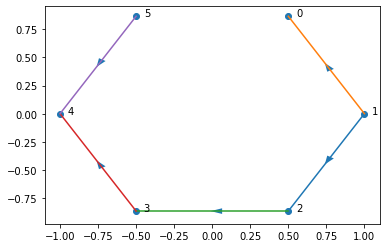

In [12]:
import numpy as np
import matplotlib.pyplot as plt

graph = [[], [2, 0], [3], [4], [], [4]]
def plotGraph(graph):
    no_node = len(graph)
    nodeX = []
    nodeY = []
    for i in range(no_node):
        value = np.exp(-2j*np.pi*i/no_node)
        value *= np.exp(1j*np.pi/3)
        x, y = np.real(value), np.imag(value)
        nodeX.append(x)
        nodeY.append(y)
    plt.scatter(nodeX, nodeY)
    delta = 0.01
    for i in range(len(graph)):
        plt.text(nodeX[i]+0.05, nodeY[i], "{}".format(i))
        for j in (graph[i]):
            plt.plot([nodeX[i], nodeX[j]],[nodeY[i], nodeY[j]])
            slope = (nodeY[j]-nodeY[i])/(nodeX[j]-nodeX[i])
            direction = -(nodeX[i]-nodeX[j])/abs(nodeX[i]-nodeX[j])
            plt.arrow((nodeX[i]+nodeX[j])/2,(nodeY[i]+nodeY[j])/2, direction*delta, direction*delta*slope, shape='full', lw=0, length_includes_head=True, head_width=.05)
    plt.show()
    
plotGraph(graph)